<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/Aplikasi-Login/blob/main/SPENDINg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Masukkan data Anda untuk mendapatkan rekomendasi pengeluaran.
Masukkan pemasukan bulanan Anda (IDR): 100
Masukkan pengeluaran Anda untuk tuition_idr (IDR): 20
Masukkan pengeluaran Anda untuk housing_idr (IDR): 10
Masukkan pengeluaran Anda untuk food_idr (IDR): 10
Masukkan pengeluaran Anda untuk transportation_idr (IDR): 10
Masukkan pengeluaran Anda untuk books_supplies_idr (IDR): 10
Masukkan pengeluaran Anda untuk entertainment_idr (IDR): 20
Masukkan pengeluaran Anda untuk personal_care_idr (IDR): 10
Masukkan pengeluaran Anda untuk technology_idr (IDR): 10
Masukkan pengeluaran Anda untuk health_wellness_idr (IDR): 10
Masukkan pengeluaran Anda untuk miscellaneous_idr (IDR): 10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Rekomendasi Pengeluaran yang Disesuaikan:
tuition_idr: Rp 56.35
housing_idr: Rp 10.06
food_idr: Rp 3.03
transportation_idr: Rp 1.43
books_supplies_idr: Rp 1.83
entertainment_idr: Rp 1.34
personal_care_idr: Rp 0.71
technology_idr: Rp 2.01
health_wellness_idr: Rp 1.69
miscellaneous_idr: Rp 1.57


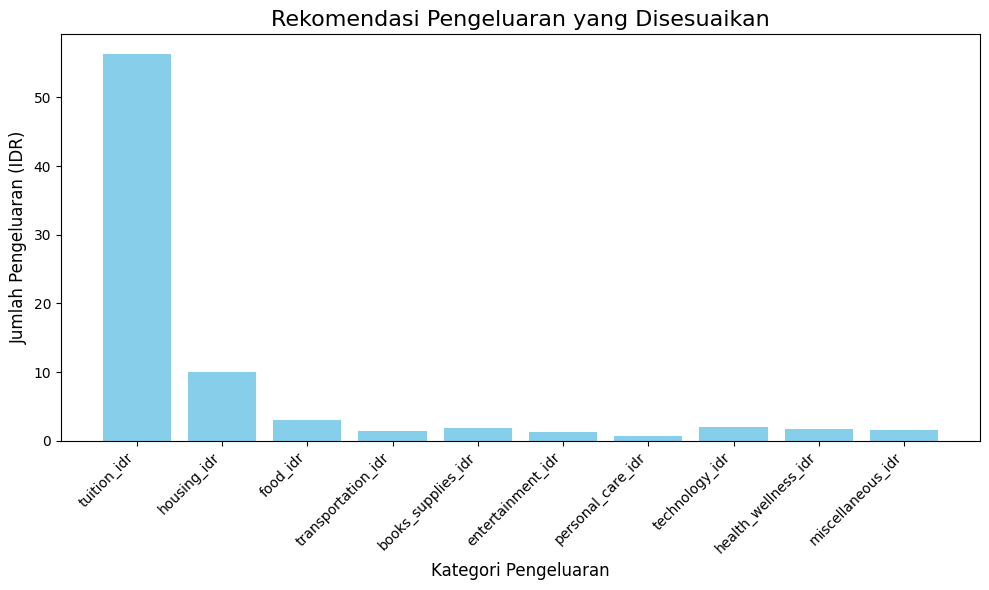

In [3]:
# 1. Import Library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 2. Load Dataset
file_path = 'student_spending_cleaned.csv'
data = pd.read_csv(file_path)

# 3. Preprocessing Data
spending_columns = ['tuition_idr', 'housing_idr', 'food_idr', 'transportation_idr',
                    'books_supplies_idr', 'entertainment_idr', 'personal_care_idr',
                    'technology_idr', 'health_wellness_idr', 'miscellaneous_idr']

spending_data = data[spending_columns]

# Normalisasi data pengeluaran
scaler = StandardScaler()
spending_scaled = scaler.fit_transform(spending_data)

# 4. K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(spending_scaled)

# Tambahkan label klaster ke dataset
data['cluster'] = clusters

# Hitung rata-rata pengeluaran per kategori untuk setiap klaster
recommendations = data.groupby('cluster')[spending_columns].mean()

# 5. Fungsi Rekomendasi
def recommend_spending(user_income, user_spending, max_allocation=0.8):
    """
    Memberikan rekomendasi pengeluaran berdasarkan klaster pengeluaran mahasiswa,
    dengan penyesuaian agar total rekomendasi tidak melebihi batas pendapatan.
    """
    # Normalisasi input user
    user_data = user_spending
    user_scaled = scaler.transform([user_data])  # Normalisasi data user

    # Prediksi klaster untuk user
    cluster = kmeans.predict(user_scaled)[0]

    # Ambil rata-rata pengeluaran untuk klaster yang sesuai
    raw_recommendation = recommendations.loc[cluster].to_dict()

    # Hitung total rekomendasi awal
    total_recommended = sum(raw_recommendation.values())

    # Hitung batas maksimal pengeluaran (contohnya 80% dari pendapatan)
    max_expenses = user_income * max_allocation

    # Jika total rekomendasi lebih besar dari batas, sesuaikan proporsinya
    if total_recommended > max_expenses:
        scale_factor = max_expenses / total_recommended
        adjusted_recommendation = {k: v * scale_factor for k, v in raw_recommendation.items()}
    else:
        adjusted_recommendation = raw_recommendation

    return adjusted_recommendation

# 6. Input dari Pengguna
print("Masukkan data Anda untuk mendapatkan rekomendasi pengeluaran.")
user_income = float(input("Masukkan pemasukan bulanan Anda (IDR): "))
user_spending = []
for category in spending_columns:
    amount = float(input(f"Masukkan pengeluaran Anda untuk {category} (IDR): "))
    user_spending.append(amount)

# 7. Generate Rekomendasi
adjusted_recommendation = recommend_spending(user_income, user_spending)

# 8. Tampilkan Rekomendasi
print("\nRekomendasi Pengeluaran yang Disesuaikan:")
for category, amount in adjusted_recommendation.items():
    print(f"{category}: Rp {amount:,.2f}")

# 9. Plot Rekomendasi dalam Grafik Batang
plt.figure(figsize=(10, 6))
categories = list(adjusted_recommendation.keys())
values = list(adjusted_recommendation.values())

plt.bar(categories, values, color='skyblue')
plt.title('Rekomendasi Pengeluaran yang Disesuaikan', fontsize=16)
plt.xlabel('Kategori Pengeluaran', fontsize=12)
plt.ylabel('Jumlah Pengeluaran (IDR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
